### Building the model using logistic regression without sampling

In [1]:
import pandas as pd 

# Loads the training data
train_data = pd.read_csv("train_averages.csv",header=None)
train_data

,0,1,2,3,4,5,6,7,8,9,...,43,44,45,46,47,48,49,50,51,52
0,97.00,82.86,0.41,29.57,0.35,22.71,0.82,42.57,17.00,11.14,...,0.32,26.00,0.75,50.43,21.43,9.29,6.71,14.00,23.29,1
1,99.57,84.00,0.41,29.57,0.36,24.29,0.82,43.00,16.57,11.29,...,0.36,20.00,0.74,44.57,26.00,8.43,6.86,16.57,23.14,-1
2,113.71,83.43,0.49,23.86,0.34,30.57,0.79,42.43,22.00,8.00,...,0.40,20.86,0.75,45.57,25.14,7.86,4.71,14.71,19.14,1
3,108.00,84.14,0.45,29.00,0.36,27.57,0.77,46.29,21.14,8.71,...,0.35,28.86,0.78,41.00,21.57,9.14,5.57,14.57,21.86,-1
4,117.43,83.29,0.52,30.86,0.42,20.43,0.87,45.47,30.86,8.86,...,0.31,23.57,0.70,45.00,23.00,8.71,5.29,15.71,19.71,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,107.29,91.00,0.45,32.00,0.38,17.00,0.80,42.57,25.43,7.71,...,0.31,18.00,0.70,44.57,25.29,6.43,4.57,13.29,18.71,-1
995,110.43,90.29,0.44,33.00,0.35,27.00,0.74,48.00,20.86,9.57,...,0.38,23.86,0.81,44.14,27.00,9.29,5.00,13.86,17.71,1
996,120.29,92.00,0.51,30.71,0.36,23.00,0.72,50.14,32.71,8.86,...,0.42,23.57,0.84,46.00,26.29,5.00,5.29,14.43,20.43,1
997,101.00,87.86,0.46,25.14,0.33,14.29,0.79,41.57,24.43,6.00,...,0.34,19.00,0.77,45.00,21.71,7.29,4.57,11.86,19.86,1


In [2]:
# Splits training data into X (features) and Y (target)
Y_train = train_data[52]
X_train = train_data.drop([52],axis=1)
print(Y_train.value_counts())

 1    579
-1    420
Name: 52, dtype: int64


In [3]:
# Loads the testing data
test_data = pd.read_csv("test_averages.csv",header=None)
test_data

,0,1,2,3,4,5,6,7,8,9,...,43,44,45,46,47,48,49,50,51,52
0,121.43,88.57,0.51,30.57,0.41,23.71,0.83,48.14,32.86,6.71,...,0.36,22.57,0.81,48.71,20.00,6.43,4.86,13.57,20.86,1
1,118.86,93.86,0.46,34.00,0.35,24.43,0.82,54.57,21.14,6.14,...,0.31,24.86,0.73,47.00,22.86,6.57,3.71,14.29,21.43,1
2,108.86,88.57,0.44,33.29,0.38,26.57,0.69,49.14,22.71,6.71,...,0.33,21.29,0.77,45.57,22.57,8.57,5.29,11.00,23.43,-1
3,112.00,89.57,0.46,30.71,0.33,25.86,0.73,46.43,26.29,8.57,...,0.31,24.71,0.76,43.57,19.86,7.86,5.29,13.71,19.14,-1
4,122.57,86.86,0.52,29.14,0.44,24.14,0.81,45.00,32.71,7.00,...,0.41,27.29,0.72,48.43,26.71,9.57,5.00,17.71,22.57,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
178,106.14,89.29,0.45,28.29,0.35,19.29,0.80,42.00,19.14,5.71,...,0.35,27.14,0.73,46.29,29.29,6.43,8.14,11.86,22.71,1
179,104.14,86.29,0.47,25.43,0.37,18.57,0.75,48.00,27.14,9.57,...,0.44,20.00,0.77,43.29,27.00,6.29,6.14,13.57,20.86,1
180,99.14,83.29,0.45,28.00,0.31,20.43,0.73,41.14,23.00,8.86,...,0.45,22.86,0.73,44.71,27.00,8.00,5.57,12.43,20.71,1
181,111.00,85.57,0.46,31.43,0.36,28.29,0.75,49.14,22.86,8.71,...,0.37,24.71,0.77,48.29,26.71,12.86,6.00,18.00,23.29,1


In [4]:
# Splits testing data into X (features) and Y (target)
Y_test = test_data[52]
X_test = test_data.drop(52,axis=1)

In [5]:
from sklearn import linear_model
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
import numpy as np

# Hyperparameter tuning using 10-fold cross validation
regularizers = [0.01, 0.02, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5]
validationAcc = np.zeros(len(regularizers))
testAcc = np.zeros(len(regularizers))
numFolds = 10
index = 0

for C in regularizers:
    clf = linear_model.LogisticRegression(C=C, max_iter =3000)
    scores = cross_val_score(clf, X_train, Y_train)
    validationAcc[index] = np.mean(scores)
    
    clf = clf.fit(X_train, Y_train)
    Y_pred = clf.predict(X_test)
    testAcc[index] = accuracy_score(Y_test, Y_pred)
    index += 1

Best hyperparameter, C = 0.05
Test Accuracy = 0.6338797814207651
Root mean squared error = 1.2102
R-square = -0.5201


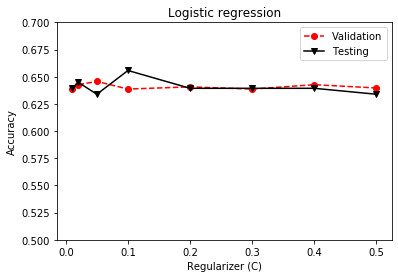

In [6]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score

# Visualization of results of hyperparameter tuning 
plt.plot(regularizers, validationAcc, 'ro--', regularizers, testAcc, 'kv-')
plt.xlabel('Regularizer (C)')
plt.ylabel('Accuracy')
plt.title('Logistic regression')
plt.legend(['Validation','Testing'])
plt.ylim([0.5,0.7])

# Chooses the best hyperparameter
bestHyperparam = np.argmax(validationAcc)
print('Best hyperparameter, C =', regularizers[bestHyperparam])
print('Test Accuracy =', testAcc[bestHyperparam])

# Retrains using the chosen best hyperparameter
clf = linear_model.LogisticRegression(C=regularizers[bestHyperparam],max_iter =3000)
clf.fit(X_train, Y_train)
Y_pred = clf.predict(X_test)

# Calculates RMSE and R-square
print("Root mean squared error = %.4f" % np.sqrt(mean_squared_error(Y_test, Y_pred)) )
print("R-square = %.4f" % r2_score(Y_test, Y_pred) )

In [7]:
# Displays the coefficients of each feature
clf.coef_

array([[ 0.03790026,  0.00211881,  0.00178025,  0.04046478, -0.02843605,
         0.01826003, -0.00931299, -0.0018117 ,  0.01230399,  0.04064543,
         0.10473779, -0.07019243, -0.05391503, -0.03074817,  0.00052559,
         0.00562904, -0.02504148,  0.00867735,  0.02383538, -0.01482423,
        -0.10799538,  0.00979909, -0.04775127, -0.15650125,  0.0109438 ,
        -0.00529435, -0.07681985,  0.00141697, -0.00107975, -0.01558171,
        -0.01986164, -0.00073488,  0.02892995, -0.04479082,  0.05375093,
        -0.12559837, -0.1549326 , -0.02359497, -0.01984352,  0.04439829,
         0.0049149 ,  0.00424445,  0.0033035 , -0.04227616,  0.04620696,
         0.01306002,  0.01517969, -0.01443627, -0.0277611 , -0.01353027,
         0.07189051,  0.04271294]])

In [8]:
from sklearn.metrics import confusion_matrix

# Calculates the confusion matrix
cm = confusion_matrix(Y_test, Y_pred)
pd.DataFrame(cm)

,0,1
0,39,35
1,32,77


In [9]:
from sklearn.metrics import f1_score

# Calculates the average f1 score
f1a = f1_score(Y_test,Y_pred,labels=['-1','1'],pos_label=-1)
f1b = f1_score(Y_test,Y_pred,labels=['-1','1'],pos_label=1)
print("Average F1 Score = ", (f1a+f1b)/2)

Average F1 Score =  0.6173818068341395


### Building the model using logistic regression with sampling

In [10]:
import pandas as pd 

# Loads the training data
initial_train_data = pd.read_csv("train_averages.csv",header=None)
initial_train_data

,0,1,2,3,4,5,6,7,8,9,...,43,44,45,46,47,48,49,50,51,52
0,97.00,82.86,0.41,29.57,0.35,22.71,0.82,42.57,17.00,11.14,...,0.32,26.00,0.75,50.43,21.43,9.29,6.71,14.00,23.29,1
1,99.57,84.00,0.41,29.57,0.36,24.29,0.82,43.00,16.57,11.29,...,0.36,20.00,0.74,44.57,26.00,8.43,6.86,16.57,23.14,-1
2,113.71,83.43,0.49,23.86,0.34,30.57,0.79,42.43,22.00,8.00,...,0.40,20.86,0.75,45.57,25.14,7.86,4.71,14.71,19.14,1
3,108.00,84.14,0.45,29.00,0.36,27.57,0.77,46.29,21.14,8.71,...,0.35,28.86,0.78,41.00,21.57,9.14,5.57,14.57,21.86,-1
4,117.43,83.29,0.52,30.86,0.42,20.43,0.87,45.47,30.86,8.86,...,0.31,23.57,0.70,45.00,23.00,8.71,5.29,15.71,19.71,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,107.29,91.00,0.45,32.00,0.38,17.00,0.80,42.57,25.43,7.71,...,0.31,18.00,0.70,44.57,25.29,6.43,4.57,13.29,18.71,-1
995,110.43,90.29,0.44,33.00,0.35,27.00,0.74,48.00,20.86,9.57,...,0.38,23.86,0.81,44.14,27.00,9.29,5.00,13.86,17.71,1
996,120.29,92.00,0.51,30.71,0.36,23.00,0.72,50.14,32.71,8.86,...,0.42,23.57,0.84,46.00,26.29,5.00,5.29,14.43,20.43,1
997,101.00,87.86,0.46,25.14,0.33,14.29,0.79,41.57,24.43,6.00,...,0.34,19.00,0.77,45.00,21.71,7.29,4.57,11.86,19.86,1


In [11]:
# Samples the '-1' with replacement and makes the larger final_train_data
positive_train_data = initial_train_data[initial_train_data[52] == 1]
negative_train_data = initial_train_data[initial_train_data[52] == -1]
sampled_negative_train_data = negative_train_data.sample(n=579,replace=True)
final_train_data = pd.concat([positive_train_data,sampled_negative_train_data])
final_train_data

,0,1,2,3,4,5,6,7,8,9,...,43,44,45,46,47,48,49,50,51,52
0,97.00,82.86,0.41,29.57,0.35,22.71,0.82,42.57,17.00,11.14,...,0.32,26.00,0.75,50.43,21.43,9.29,6.71,14.00,23.29,1
2,113.71,83.43,0.49,23.86,0.34,30.57,0.79,42.43,22.00,8.00,...,0.40,20.86,0.75,45.57,25.14,7.86,4.71,14.71,19.14,1
4,117.43,83.29,0.52,30.86,0.42,20.43,0.87,45.47,30.86,8.86,...,0.31,23.57,0.70,45.00,23.00,8.71,5.29,15.71,19.71,1
6,101.14,82.86,0.45,22.43,0.36,21.57,0.85,44.57,18.86,7.29,...,0.31,20.86,0.73,45.29,24.86,7.29,5.14,15.43,20.29,1
10,107.57,85.29,0.48,25.29,0.41,19.43,0.78,45.00,25.57,7.43,...,0.33,21.86,0.80,42.71,21.86,7.43,5.57,18.29,19.86,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141,103.57,86.57,0.46,30.00,0.33,21.14,0.69,42.00,21.86,9.00,...,0.40,17.29,0.76,43.29,26.29,8.86,5.29,13.57,20.43,-1
913,109.43,86.86,0.46,31.86,0.35,23.86,0.79,49.00,25.29,6.71,...,0.38,22.43,0.78,44.86,25.14,7.00,4.86,11.71,15.71,-1
397,113.43,94.14,0.46,31.14,0.36,18.86,0.76,46.43,22.43,8.71,...,0.37,22.43,0.71,42.71,21.29,7.71,4.57,12.43,19.29,-1
49,113.57,88.29,0.47,25.43,0.39,28.57,0.70,47.71,22.00,5.86,...,0.39,18.00,0.78,43.00,22.00,8.14,4.00,13.43,21.14,-1


In [12]:
# Splits training data into X (features) and Y (target)
Y_train = final_train_data[52]
X_train = final_train_data.drop([52],axis=1)
print(Y_train.value_counts())

 1    579
-1    579
Name: 52, dtype: int64


In [13]:
# Loads the testing data
test_data = pd.read_csv("test_averages.csv",header=None)
test_data

,0,1,2,3,4,5,6,7,8,9,...,43,44,45,46,47,48,49,50,51,52
0,121.43,88.57,0.51,30.57,0.41,23.71,0.83,48.14,32.86,6.71,...,0.36,22.57,0.81,48.71,20.00,6.43,4.86,13.57,20.86,1
1,118.86,93.86,0.46,34.00,0.35,24.43,0.82,54.57,21.14,6.14,...,0.31,24.86,0.73,47.00,22.86,6.57,3.71,14.29,21.43,1
2,108.86,88.57,0.44,33.29,0.38,26.57,0.69,49.14,22.71,6.71,...,0.33,21.29,0.77,45.57,22.57,8.57,5.29,11.00,23.43,-1
3,112.00,89.57,0.46,30.71,0.33,25.86,0.73,46.43,26.29,8.57,...,0.31,24.71,0.76,43.57,19.86,7.86,5.29,13.71,19.14,-1
4,122.57,86.86,0.52,29.14,0.44,24.14,0.81,45.00,32.71,7.00,...,0.41,27.29,0.72,48.43,26.71,9.57,5.00,17.71,22.57,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
178,106.14,89.29,0.45,28.29,0.35,19.29,0.80,42.00,19.14,5.71,...,0.35,27.14,0.73,46.29,29.29,6.43,8.14,11.86,22.71,1
179,104.14,86.29,0.47,25.43,0.37,18.57,0.75,48.00,27.14,9.57,...,0.44,20.00,0.77,43.29,27.00,6.29,6.14,13.57,20.86,1
180,99.14,83.29,0.45,28.00,0.31,20.43,0.73,41.14,23.00,8.86,...,0.45,22.86,0.73,44.71,27.00,8.00,5.57,12.43,20.71,1
181,111.00,85.57,0.46,31.43,0.36,28.29,0.75,49.14,22.86,8.71,...,0.37,24.71,0.77,48.29,26.71,12.86,6.00,18.00,23.29,1


In [14]:
# Splits testing data into X (features) and Y (target)
Y_test = test_data[52]
X_test = test_data.drop(52,axis=1)

In [15]:
from sklearn import linear_model
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
import numpy as np

# Hyperparameter tuning using 10-fold cross validation
regularizers = [0.01, 0.02, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5]
validationAcc = np.zeros(len(regularizers))
testAcc = np.zeros(len(regularizers))
numFolds = 10
index = 0

for C in regularizers:
    clf = linear_model.LogisticRegression(C=C, max_iter =3000)
    scores = cross_val_score(clf, X_train, Y_train)
    validationAcc[index] = np.mean(scores)
    
    clf = clf.fit(X_train, Y_train)
    Y_pred = clf.predict(X_test)
    testAcc[index] = accuracy_score(Y_test, Y_pred)
    index += 1

Best hyperparameter, C = 0.01
Test Accuracy = 0.6502732240437158
Root mean squared error = 1.1828
R-square = -0.4520


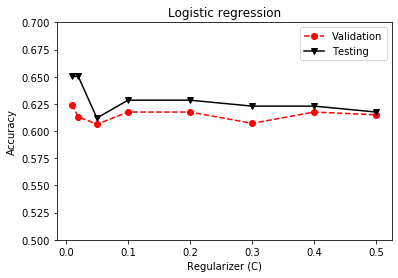

In [16]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score

# Visualization of results of hyperparameter tuning 
plt.plot(regularizers, validationAcc, 'ro--', regularizers, testAcc, 'kv-')
plt.xlabel('Regularizer (C)')
plt.ylabel('Accuracy')
plt.title('Logistic regression')
plt.legend(['Validation','Testing'])
plt.ylim([0.5,0.7])

# Chooses the best hyperparameter
bestHyperparam = np.argmax(validationAcc)
print('Best hyperparameter, C =', regularizers[bestHyperparam])
print('Test Accuracy =', testAcc[bestHyperparam])

# Retrains using the chosen best hyperparameter
clf = linear_model.LogisticRegression(C=regularizers[bestHyperparam],max_iter =3000)
clf.fit(X_train, Y_train)
Y_pred = clf.predict(X_test)

# Calculates RMSE and R-square
print("Root mean squared error = %.4f" % np.sqrt(mean_squared_error(Y_test, Y_pred)) )
print("R-square = %.4f" % r2_score(Y_test, Y_pred) )

In [17]:
# Displays the coefficients of each feature
clf.coef_

array([[ 0.04696099, -0.02554283,  0.00182697,  0.03250678, -0.0098192 ,
         0.02818901, -0.00628038,  0.01869575,  0.02364607,  0.02410144,
         0.12242428, -0.04689193, -0.08591311, -0.02723212, -0.05163331,
        -0.00032199, -0.02872376,  0.00060887,  0.00286003,  0.00473037,
        -0.04836994,  0.00947383, -0.03996734, -0.20450254, -0.02083867,
        -0.00889444, -0.05792744,  0.00320171, -0.00071782, -0.02717039,
        -0.00345101, -0.00144977,  0.00370227, -0.04042892,  0.02408327,
        -0.14603808, -0.10500475,  0.01881617,  0.05840597,  0.04125358,
         0.01746915,  0.0004349 , -0.00233958, -0.00884124,  0.00314888,
         0.00491189,  0.02805177,  0.00378775, -0.0354555 , -0.00903096,
         0.11552236, -0.01872373]])

In [18]:
from sklearn.metrics import confusion_matrix

# Calculates the confusion matrix
cm = confusion_matrix(Y_test, Y_pred)
pd.DataFrame(cm)

,0,1
0,56,18
1,46,63


In [19]:
from sklearn.metrics import f1_score

# Calculates the average f1 score
f1a = f1_score(Y_test,Y_pred,labels=['-1','1'],pos_label=-1)
f1b = f1_score(Y_test,Y_pred,labels=['-1','1'],pos_label=1)
print("Average F1 Score = ", (f1a+f1b)/2)

Average F1 Score =  0.6497607655502392
